# Metodo de Euler

## Iniciar paquetes del programa
Usamos la biblioteca **pandas** para mostrar resultados en tablas.

Usamos **matplotlib** para mostrar función en grafico.

**Numpy** para guardar los arreglos numéricos.

**Math** para tener mas variedad de operaciones para utilizar en la función.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import math

## Definir función diferencial
Definimos las operaciones de la función diferencial en cuestión.



⚠**IMPORTANTE** ⚠:

Si la funcion que vamos a aproximar no contiene parametro **y**, la opcion recomendada es darle valor aleatorio en el algoritmo (ya viene así por defecto).


In [2]:
def funcion(x:float,y:float):
    return 2*x

## Asignar valores iniciales
Asignamos el valor de h (diferencial de x), y valores iniciales de x e y.

También hay que asignar la cantidad de iteraciones que queremos.

In [11]:
# Iteraciones:
i = 5

# Diferencial de x
h = .1

# X e Y iniciales:
x0 = 0
y0 = 0

## Ejecución del algoritmo

In [13]:
# Definimos yi (yi-1 segun la notacion) para la funcion general
yi = y0


# --------------------------------------------------------------


# Listas para utilizar en dataframe y grafico

# La lista x_i contiene todos los x_i a usar, desde antes de comenzar a iterar
# Los obtenemos a partir del metodo linspace de numpy
# Los parametros son: np.linspace(inicio,fin,cantidad_de_valores)
# El parametro *fin* se incluye en el arreglo
x_i = np.linspace(x0,x0 + i*h,i)

# MUCHO CUIDADO: creamos un np array "empty", que en realidad contiene numeros aleatorios
# Hay que asegurarse de sobreescribir todos durante la iteracion
y_i = np.empty(i)


# Arreglo de error aproximado (lleno de ceros al principio)
error = np.zeros(i)


# ---------------------------------------------------------------------


# Iteraciones

for n in range(i):
    
    # Usamos la funcion general
    y_i[n] = yi + h * funcion(x_i[n],0)

    # Asignamos el error aproximado
    if n > 0:
        # math.fabs para sacar valor absoluto
        error[n] = math.fabs(100 * (y_i[n] - y_i[n-1]) / y_i[n])
    # Reasignamos el proximo valor yi (o yi-1 segun la notacion)
    yi = y_i[n]


# Inicializamos el dataframe que llenaremos con datos de la iteracion
# El metodo np.around redondea los decimales al valor del segundo parametro
df = pd.DataFrame({
    'x': np.around(x_i,3),
    'y': np.around(y_i,3),
    'error aprox': np.around(error,3)
})

# Mostramos resultado
print(df)

       x      y  error aprox
0  0.000  0.000        0.000
1  0.125  0.025      100.000
2  0.250  0.075       66.667
3  0.375  0.150       50.000
4  0.500  0.250       40.000


## Mostramos gráfico 📈
Ejecutar el codigo para ver gráficamente el resultado

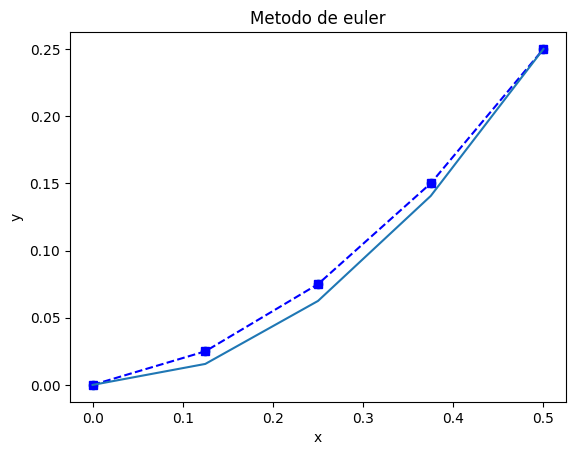

In [14]:
plt.title('Metodo de euler')
plt.xlabel('x')
plt.ylabel('y')

## Puntos
plt.scatter(x_i,y_i)
# Union de los puntos
plt.plot(x_i,y_i,'s--b')



# En este caso, se puede comparar la grafica de la aproximacion 
# con la grafica de la funcion primitiva si es facil de resolver.
# Si ese es el caso, quitarle el comentario a la linea de abajo, e ingresar en el
# segundo parametro la funcion en cuestion, que por defecto es x_i**2

plt.plot(x_i,x_i**2)